In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.diagnostic import normal_ad

In [48]:
df = pd.read_csv("Задания/Datasets/euroweight.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')
df.columns = ['CaseNumber', 'Weight', 'NumberOfPackage']
print(df.shape)
df.head(20)

(2000, 3)


C:\Users\Acer\AppData\Local\Temp\ipykernel_2336\3392309208.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Задания/Datasets/euroweight.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')


,CaseNumber,Weight,NumberOfPackage
0,1,7.512,1
1,2,7.502,1
2,3,7.461,1
3,4,7.562,1
4,5,7.528,1
5,6,7.459,1
6,7,7.518,1
7,8,7.537,1
8,9,7.517,1
9,10,7.605,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CaseNumber       2000 non-null   int64  
 1   Weight           2000 non-null   float64
 2   NumberOfPackage  2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


In [50]:
data = df.copy()
df.isnull().sum()

CaseNumber         0
Weight             0
NumberOfPackage    0
dtype: int64

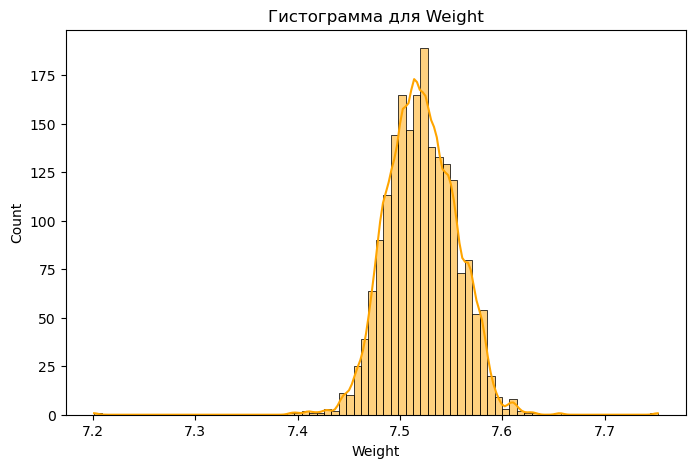

In [51]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Weight'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
# kde=True добавляет линию плотности
# dw_adjust настраивает уровень сглаживания kde
plt.title(f'Гистограмма для Weight')
plt.show()

In [52]:
# Shapiro-Wilk
stat, p = stats.shapiro(df['Weight'])
print('Shapiro-Wilk:')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")

Shapiro-Wilk:
Статистика: 0.9754729009998673 p-значение: 5.0232770717677785e-18
Нет нормального расспределения


    Гипотеза о нормальном  распределении выполняется для общей кучи

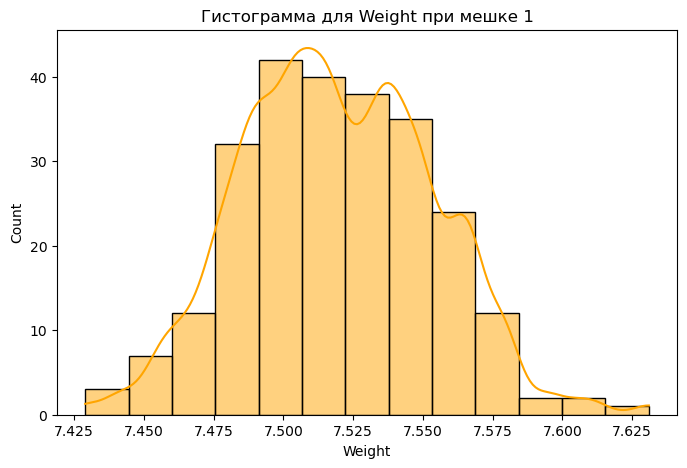

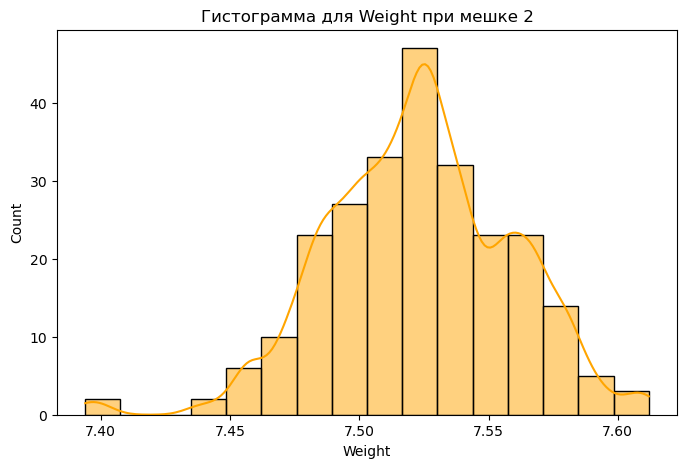

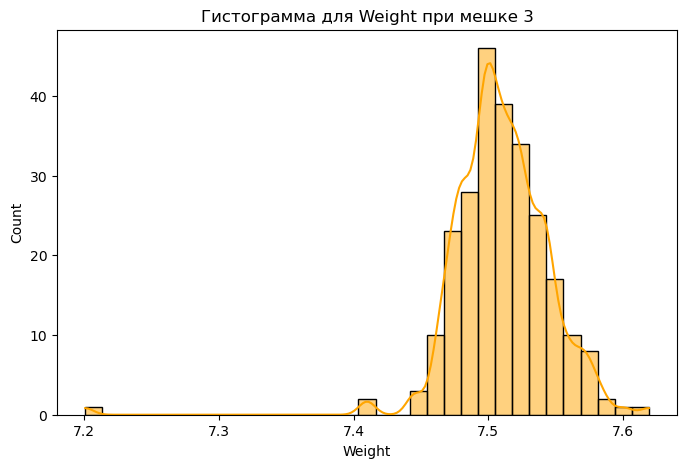

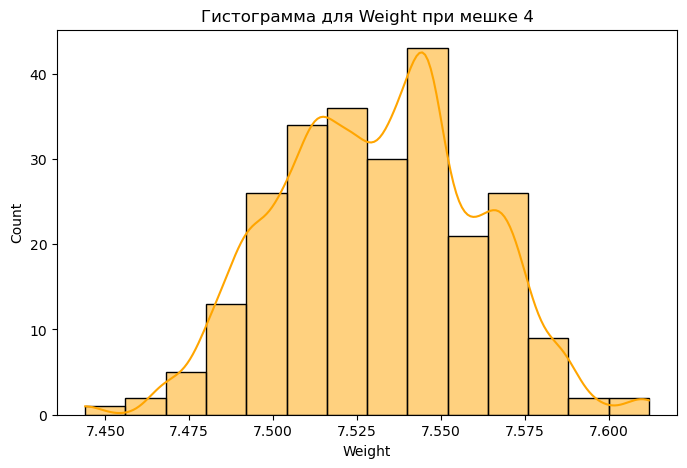

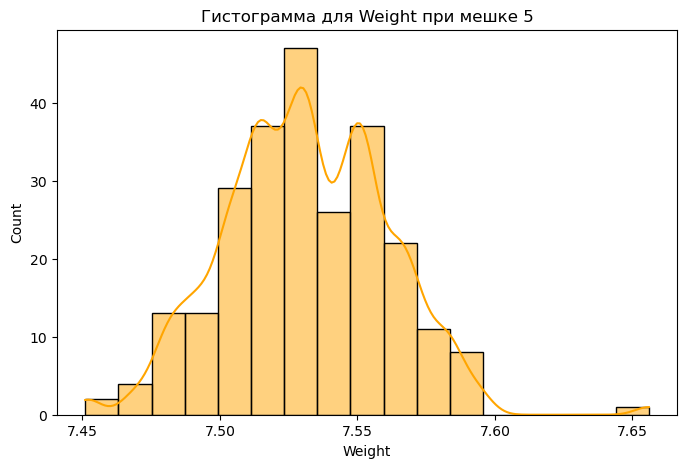

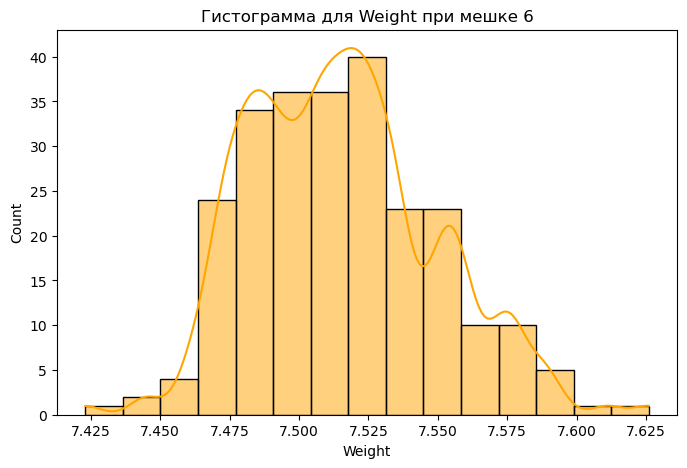

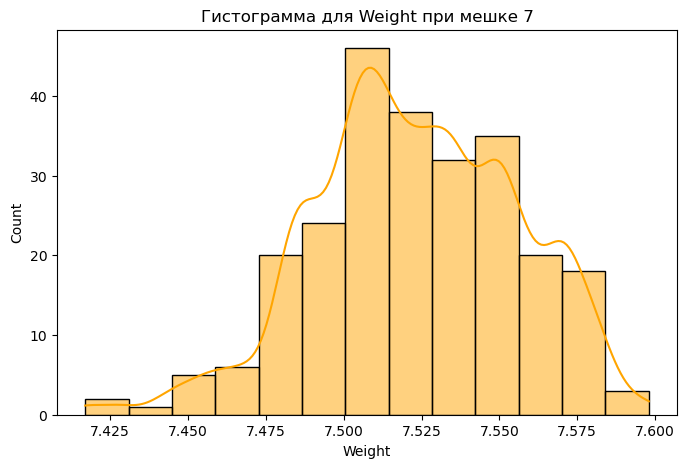

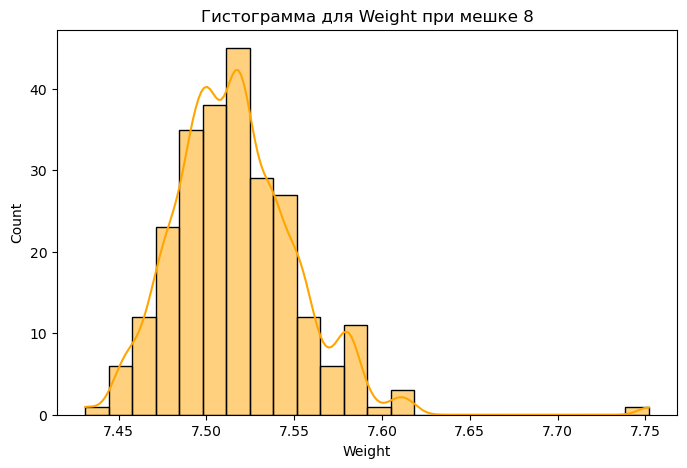

In [53]:
for i in range(1,9):
    subdata = df[df['NumberOfPackage'] == i]
    plt.figure(figsize=(8, 5))
    sns.histplot(subdata['Weight'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
    # kde=True добавляет линию плотности
    # dw_adjust настраивает уровень сглаживания kde
    plt.title(f'Гистограмма для Weight при мешке {i}')
    plt.show()

In [54]:
for i in range(1,9):
    subdata = df[df['NumberOfPackage'] == i]
    # Shapiro-Wilk
    stat, p = stats.shapiro(subdata['Weight'])
    print(f"Shapiro-Wilk for Pack {i}:")
    print('Статистика:', stat, 'p-значение:', p)
    if p<0.05:
        print( "Нет нормального расспределения")
    if p>0.05:
        print( "Есть нормальное расспределение")

Shapiro-Wilk for Pack 1:
Статистика: 0.9955065633661141 p-значение: 0.6830016984326865
Есть нормальное расспределение
Shapiro-Wilk for Pack 2:
Статистика: 0.9909000904488608 p-значение: 0.12187697982856183
Есть нормальное расспределение
Shapiro-Wilk for Pack 3:
Статистика: 0.8634321390915006 p-значение: 4.089444265913068e-14
Нет нормального расспределения
Shapiro-Wilk for Pack 4:
Статистика: 0.9955047033510325 p-значение: 0.6826586479147758
Есть нормальное расспределение
Shapiro-Wilk for Pack 5:
Статистика: 0.9910339934809614 p-значение: 0.12899280195551321
Есть нормальное расспределение
Shapiro-Wilk for Pack 6:
Статистика: 0.9840594568487764 p-значение: 0.00675649870366926
Нет нормального расспределения
Shapiro-Wilk for Pack 7:
Статистика: 0.9907008441292615 p-значение: 0.11198343339010453
Есть нормальное расспределение
Shapiro-Wilk for Pack 8:
Статистика: 0.9367201394772202 p-значение: 6.827697448615065e-09
Нет нормального расспределения


In [55]:
# Предполагая, что df - ваш DataFrame и 'Weight' - имя колонки с весом

# Извлекаем данные по весу
data = df['Weight']

# Расчет среднего и стандартного отклонения
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # Используем ddof=1 для выборочного стандартного отклонения
n = len(data)

# Уровень доверия
confidence_level = 0.95
alpha = 1 - confidence_level

# Определяем критическое значение (z-значение для нормального распределения)
z_critical = stats.norm.ppf(1 - alpha / 2)

# Вычисляем стандартную ошибку
standard_error = std_dev / np.sqrt(n)

# Рассчитываем доверительные интервалы
margin_of_error = z_critical * standard_error

# Доверительный интервал для среднего
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# Определяем критические значения хи-квадрат
chi2_lower = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

# Вычисляем доверительные интервалы для стандартного отклонения
lower_bound = np.sqrt((n - 1) * std_dev**2 / chi2_upper)
upper_bound = np.sqrt((n - 1) * std_dev**2 / chi2_lower)

print(f"Доверительный интервал для стандартного отклонения: ({lower_bound:.2f}, {upper_bound:.2f})")
print(f"Доверительный интервал для среднего: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")


Доверительный интервал для стандартного отклонения: (0.03, 0.04)
Доверительный интервал для среднего: 7.52 - 7.52
